# Axis Insurance

* Explore the dataset and extract insights using Exploratory Data Analysis.
* Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?
* Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.
* Is the proportion of smokers significantly different across different regions?
* Is the mean BMI of women with no children, one child and two children the same? Explain your answer with statistical evidence.

## Load required libraries

In [1]:
# import packaged: numpy, pandas, plotlib and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
import seaborn as sns

from scipy.stats import t, ttest_ind
from scipy import stats

from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import anova_lm # For n-way ANOVA

## Disable warnings

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load and view few rows of the dataset

In [3]:
# import csv formatted dataframe and show structure
dataset = pd.read_csv("AxisInsurance.csv")
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Observation**

* sex, smoker and region are all categorical variables
* age contains the age in years of the customers
* All other variables are numerical 

## What is my dataframe shape?

In [4]:
dataset.shape

(1338, 7)

* My dataset has 1338 rows (records) and 7 columns (variables)

## What is my dataframe info?

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Observation**

* All variables have the same number of values of 1338, meaning that I do not have missing values
* sex, smoker and region are read as objects but should be Categorical variables

# START - Data Processing

### Fixing datatypes

In [6]:
# first, copy my dataset to a new variable to avoid accidental modification
data = dataset.copy()

In [7]:
# Convert sex, smoker and region to categorical type
data['sex'] = data.sex.astype('category')
data['smoker'] = data.smoker.astype('category')
data['region'] = data.region.astype('category')

In [8]:
# Review my dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.2 KB


### Check Summary of Data

In [9]:
data.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


**Observation**

* Ofcourse we have the same number of rows accross all variables
* region has 4 unique values, while sex and smoker have 2 each.
* southeast is the most popular region
* There are more male customers than female
* The average age of the customers is 39

### Check for missing values

In [10]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Observation**

* There are no missing values in our dataset.

## START - EDA

## Explore the numerical variables

In [11]:
# User defined function to generate boxplot and histogram of my variables.
# This is essential so that I do not have to repeat
# the same block of codes for each variable

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    
    # boxplot will be created and a star will indicate the mean value of the column
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='purple')
    
    # For histogram
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) 
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

### Observations on Age


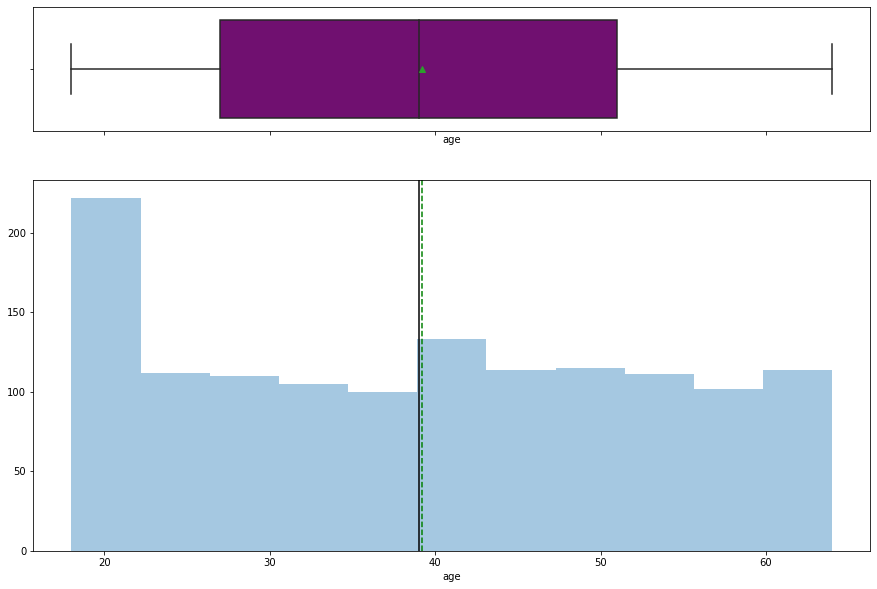

In [12]:
histogram_boxplot(data.age)

**Observation**

* We have more customer on the 20 years of age more than any other age
* Median age is 39 while mean is 39.2
* There are no outliers this variable.
* While the minimum age is 18 the maximum age above 60 years

### Observations on BMI

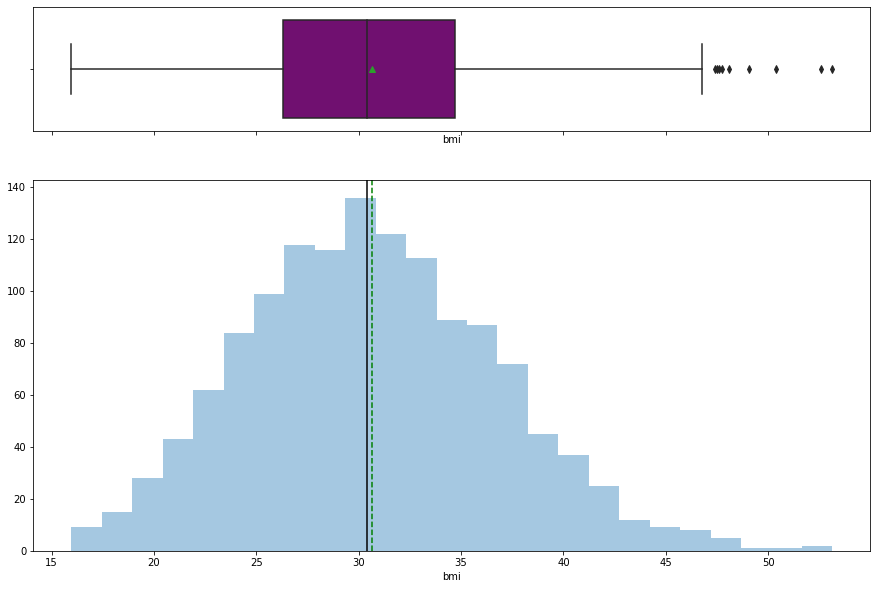

In [13]:
histogram_boxplot(data.bmi)

**Observations**

* This is normally distributed with a number of outlier to the right
* Both mean and median are quite close at 30 and 30.4 respectively

### Observations on Children

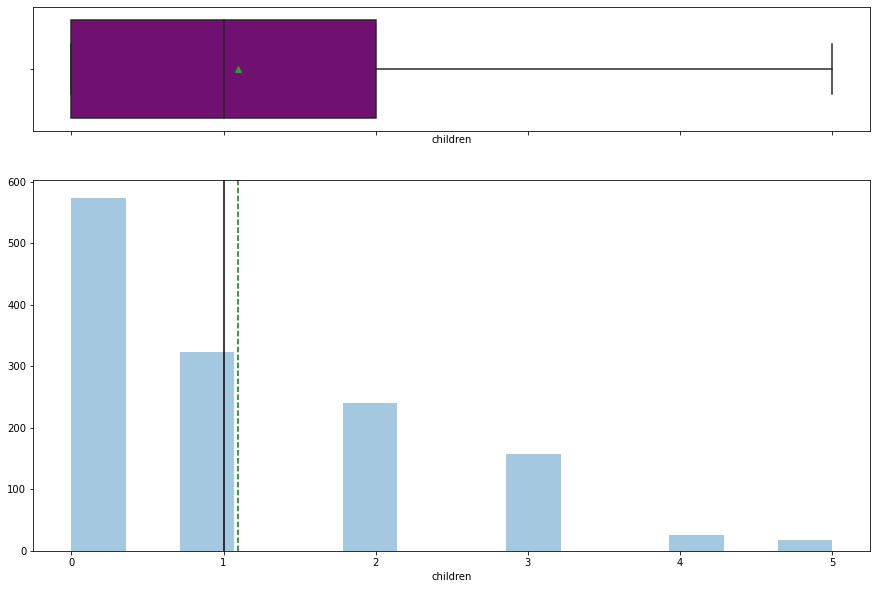

In [14]:
histogram_boxplot(data.children)

**Observation**

* The distribution of children is right skewed
* Median and mean are at 1 child
* There are no outliers

### Observations on Charges

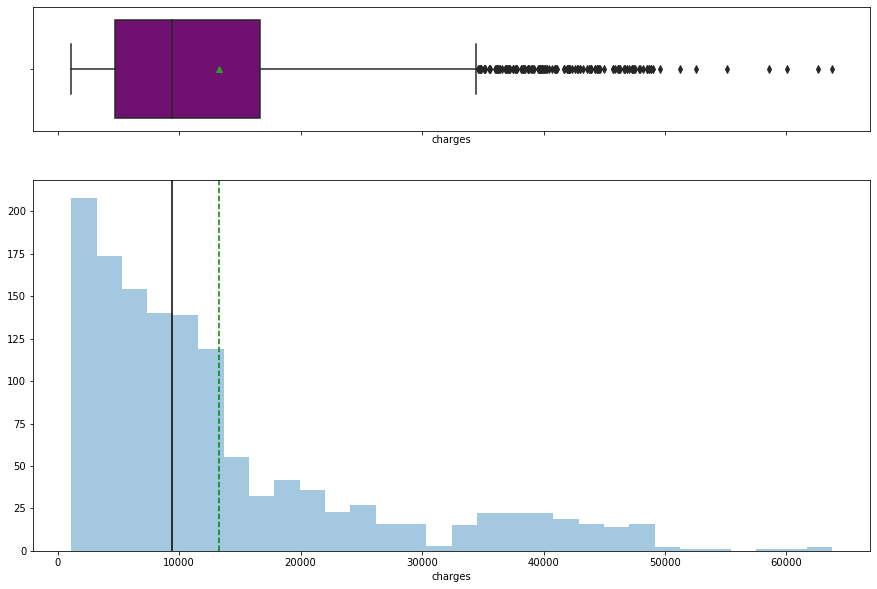

In [15]:
histogram_boxplot(data.charges)

**Observation**

* Charges is heavely skewed to the right
* Median charge is 13270 and mean is 9382
* There are so many outliers to the right
* Most charges are below 9000

## Let us explore the categorical variables now

In [16]:
# User defined function to generate barplot of my variables to indicate percentage each category
# This is essential so that I do not have to repeat
# the same block of codes for each variable

## PARAM:
## plot - 
## feature - categorical feature array

def bar_by_percentage(plot, feature):
    # get length of the column
    total = len(feature)
    
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage

### Observations on sex

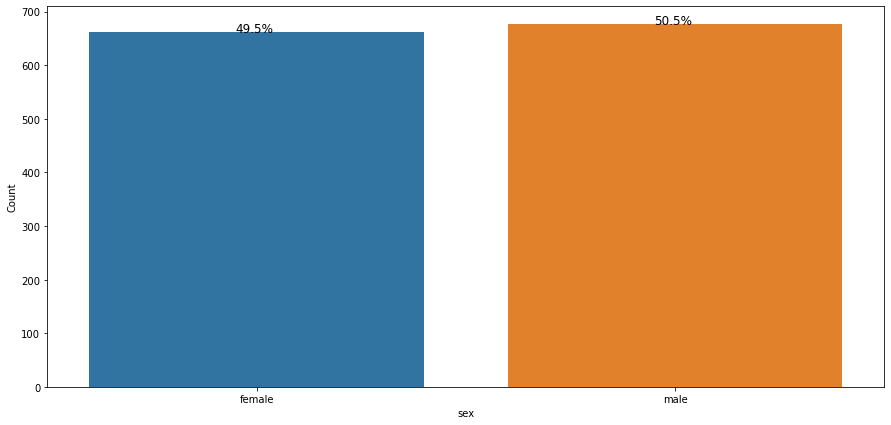

In [17]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data['sex'])
plt.xlabel('sex')
plt.ylabel('Count')
bar_by_percentage(ax, data['sex'])

**Observations**
* 50.5% of the customers are male while 49.5% are female.

### Observations on smoker

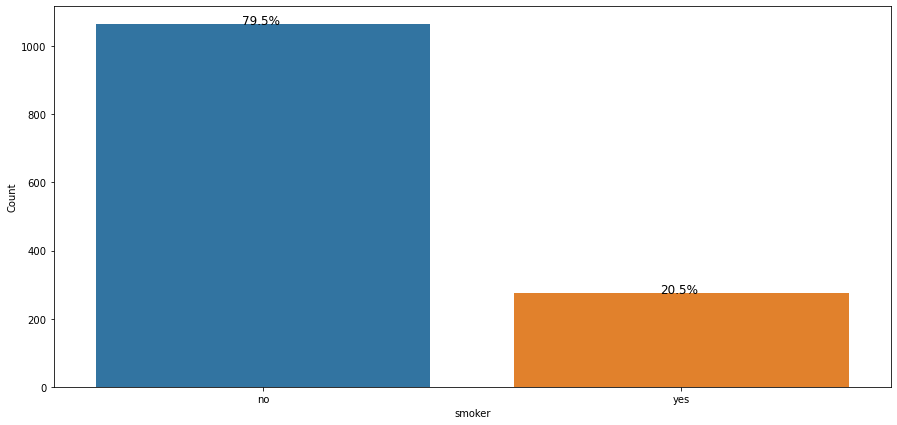

In [18]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data['smoker'])
plt.xlabel('smoker')
plt.ylabel('Count')
bar_by_percentage(ax, data['smoker'])

**Observations**
* 79.5% of the customers are non-smokers.
* It will be interesting to see the relationship between smoking and BMI
* From data available here, is not true that people who smoke are greater than those who don't. In fact, approximately 80% of the customers do not smoke.

### Observations on region

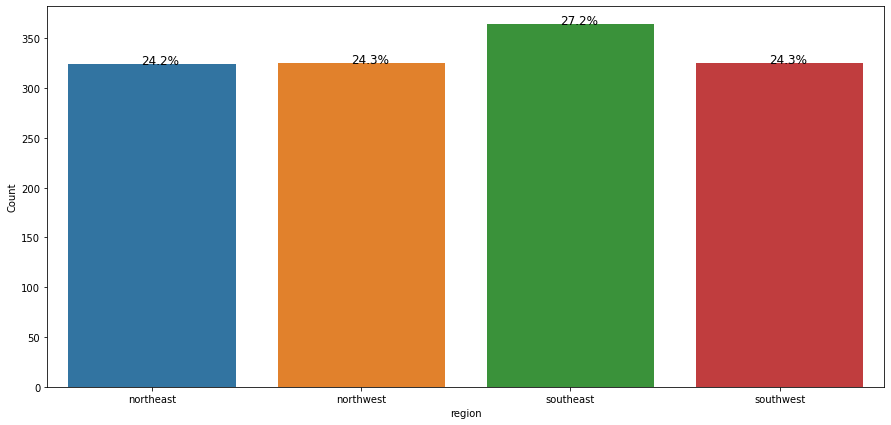

In [19]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data['region'])
plt.xlabel('region')
plt.ylabel('Count')
bar_by_percentage(ax, data['region'])

**Observations**
* Region is uniformly distributed, except that Southeast is at 27.2% while other 3 regions are at ~24%.

## Multivariate Analysis

### Obverving the relation between all variables using Pairplot

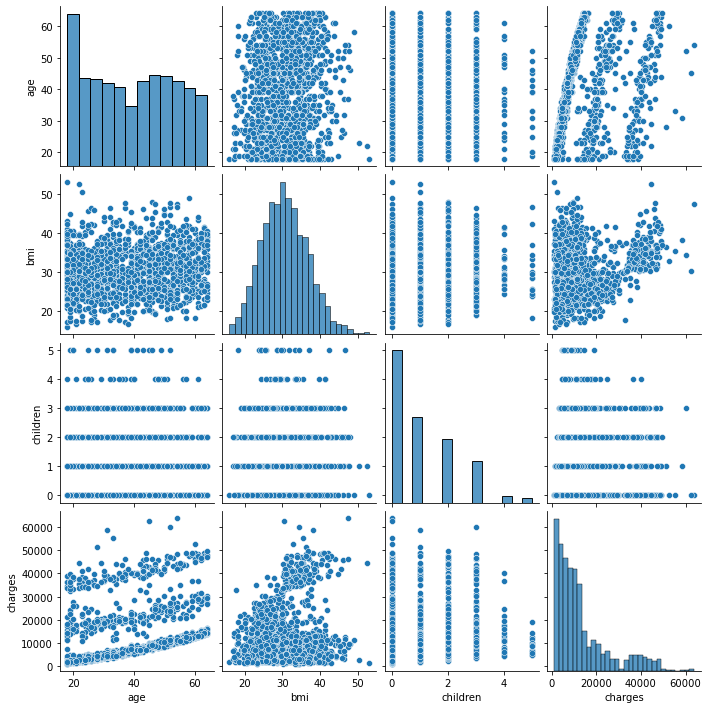

In [20]:
sns.pairplot(data)

**Observations**
* We notice a positive correction between age and bmi and charges

In [21]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


### Using heatmap to observe correction above

<AxesSubplot:>

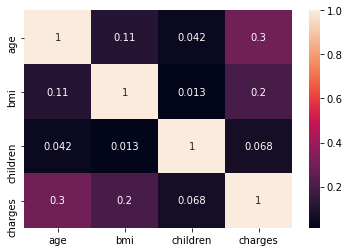

In [22]:
sns.heatmap(data.corr(), annot=True)

**Observations**

* A quick glance shows that there is more positive correction between Age and Charges.
* I was actually expecting a higher positive correction than 0.2 between BMI and Charges than I see in the heatmap above
* No negative correction observed.

### Obverving the relation between BMI and Charges with hue=sex

<AxesSubplot:xlabel='bmi', ylabel='charges'>

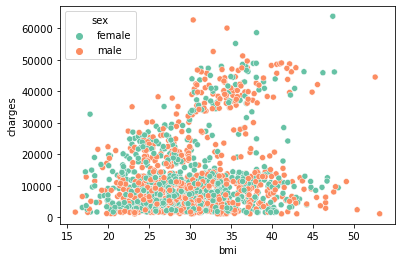

In [23]:
sns.scatterplot(data["bmi"], data["charges"],  hue=data["sex"], palette="Set2")

### BMI and Children

In [24]:
data.groupby(['children', 'sex']).mean()


age        bmi       charges
children sex                                       
0        female  38.346021  30.361522  11905.714276
         male    38.543860  30.741719  12832.696736
1        female  39.506329  30.052658  12161.360414
         male    39.403614  31.166145  13273.522458
2        female  40.512605  30.649790  13941.317326
         male    38.396694  31.300992  16187.095325
3        female  42.181818  30.436429  13865.605066
         male    40.975000  30.922937  16789.167419
4        female  42.000000  31.943182  13937.674562
         male    36.642857  30.957500  13782.284829
5        female  37.000000  30.620625   9854.006419
         male    34.500000  28.792500   7931.658310

Text(0.5, 0, 'Number of Children')

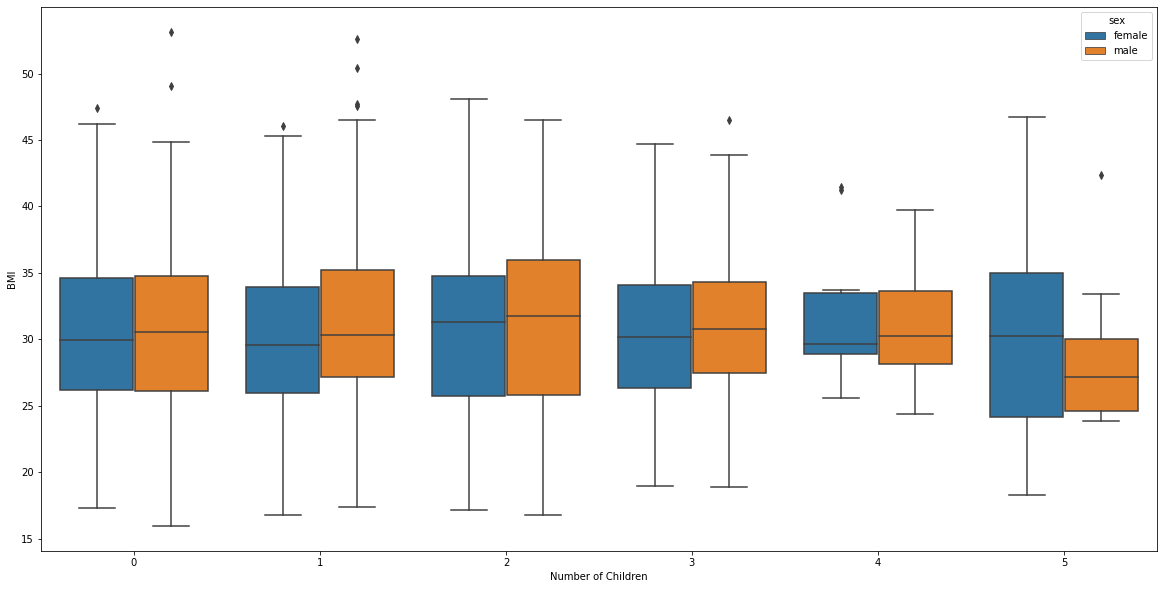

In [25]:
plt.figure(figsize=(20,10))           
sns.boxplot(data['children'],data['bmi'], hue=data['sex'])
plt.ylabel('BMI')
plt.xlabel('Number of Children')

#### Observation

* The mean BMI of Female with no children, 1 child and 2 children are approximately 30.


### BMI and Sex

Text(0.5, 0, 'Sex')

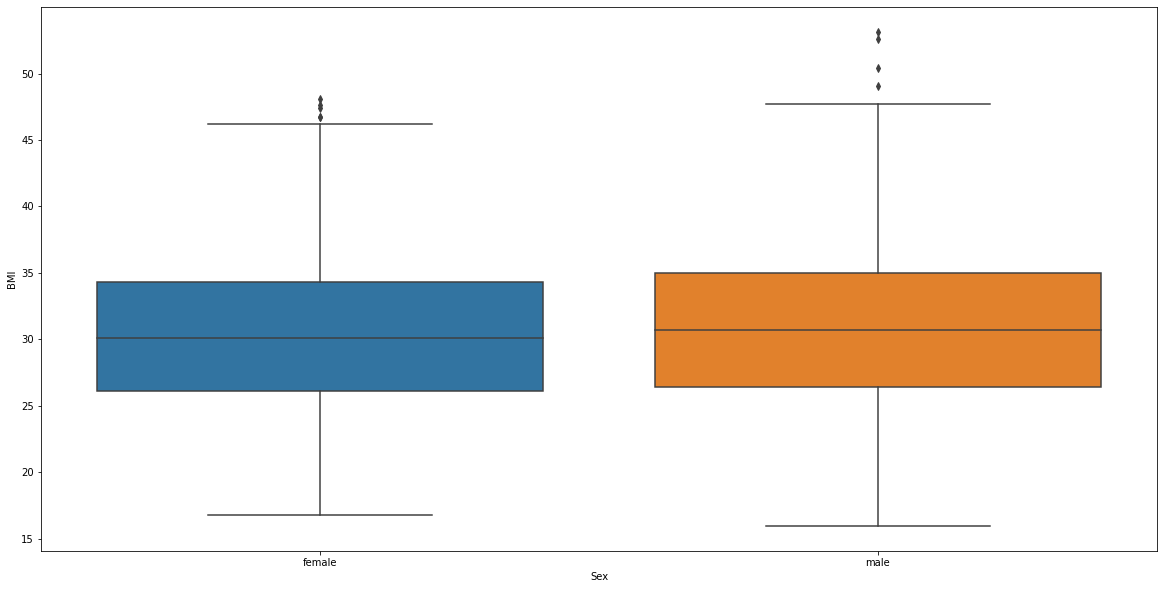

In [26]:
plt.figure(figsize=(20,10))           
sns.boxplot(data['sex'],data['bmi'])
plt.ylabel('BMI')
plt.xlabel('Sex')

**Observations**
* There is no clear difference between BMI of Male and Female customers
* Both male and female have average BMI around the 30 mark, with lower quantile around 26 and upper quantile around 34.
* Both have a few outlier toward the BMI of 50

### Region and Smokers

Text(0.5, 0, 'Region')

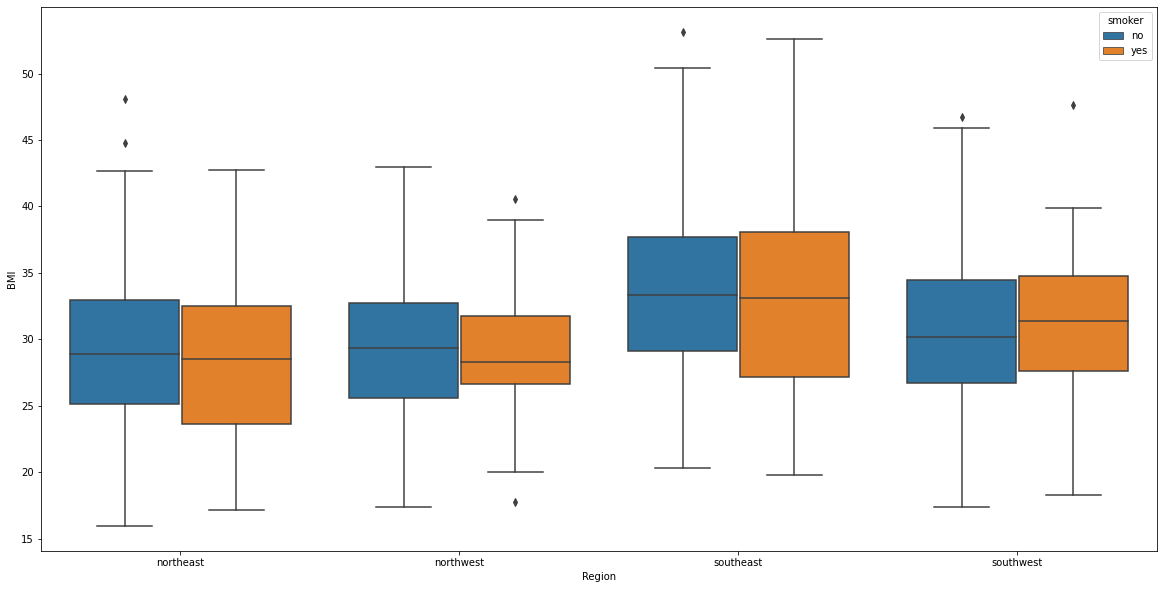

In [27]:
plt.figure(figsize=(20,10))           
sns.boxplot(data['region'],data['bmi'], hue=data['smoker'])
plt.ylabel('BMI')
plt.xlabel('Region')

#### Observation

* There is no significant difference between smokers across the different regions
* We will perform analysis of variance on this later

### Charges and Smokers

Text(0.5, 0, 'Smoker')

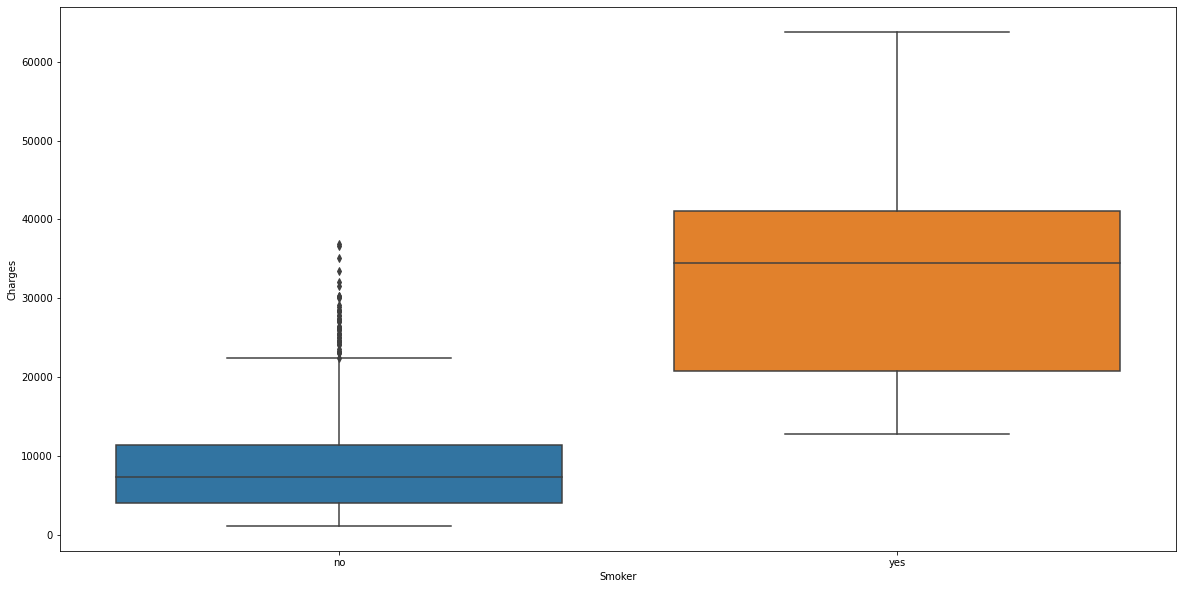

In [28]:
plt.figure(figsize=(20,10))           
sns.boxplot(data['smoker'],data['charges'])
plt.ylabel('Charges')
plt.xlabel('Smoker')

#### Observation

* There is significant difference between smokers and non smokers charges
* Medical claims by people who smoke is significantly higher than that of those who do not smoke

# Start - Hypothesis Testing

* The level of significance (Alpha ) = 0.05.
* The sample size, N = 1338 which is sufficiently large.

In [29]:
# set parameters
significant_level = 0.05
sample_size = 1338

## Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?

#### Null and alternative hypothesis

* $H_0$ : Medical claim of smokers is less than or equal to non smokers
* $H_1$ : Medical claim of smokers is greater than non smokers

In [30]:
smokers = data[data['smoker'] == 'yes'].charges  # smokers charges
non_smokers = data[data['smoker'] == 'no'].charges  # non smokers charges

# p_value > 0.05 => Fail to reject:

stat, p_value = ttest_ind(smokers, non_smokers)

# report
print('t_stat: %0.4f, p_value: %0.4f' % (stat, p_value))

if p_value > 0.05:
   print ("Fail to reject the null hypothesis")
else:
   print ("Reject the null hypothesis - suggest the alternative hypothesis is true")

t_stat: 46.6649, p_value: 0.0000
Reject the null hypothesis - suggest the alternative hypothesis is true


In [31]:
formula = 'charges ~ C(smoker)'
model = ols(formula, data).fit()
aov_table = anova_lm(model)
print(aov_table)

               df        sum_sq       mean_sq            F         PR(>F)
C(smoker)     1.0  1.215199e+11  1.215199e+11  2177.614868  8.271436e-283
Residual   1336.0  7.455432e+10  5.580413e+07          NaN            NaN


Since the p value in this scenario is less than $\alpha$ (0.05), we can say that we reject the Null Hypothesis ($H_0$).

## Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.

#### Null and alternative hypothesis

* $H_0$ : BMI of females is equal to males
* $H_1$ : BMI of females is not equal to males

In [32]:
female_bmi = data[data['sex'] == 'female'].bmi  # female bmi
male_bmi = data[data['sex'] == 'male'].bmi  # male bmi

In [33]:
# p_value > 0.05 => Fail to reject:

stat, p_value = ttest_ind(female_bmi, male_bmi)

# report
print('t_stat: %0.4f, p_value: %0.4f' % (stat, p_value))

if p_value > 0.05:
   print ("Fail to reject the null hypothesis")
else:
   print ("Reject the null hypothesis - suggest the alternative hypothesis is true")

t_stat: -1.6968, p_value: 0.0900
Fail to reject the null hypothesis


## Is the proportion of smokers significantly different across different regions?

#### Null and alternative hypothesis

* $H_0$ : Proportion of smokers is not significantly differennt across different regions
* $H_1$ : Proportion of smokers is significantly different across different regions.

**Calculate the p - value and test statistic**

In [37]:
obs = pd.crosstab(data.smoker, data.region)
chi2, pval, dof, exp_freq = stats.chi2_contingency(obs, correction = False)


if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant. aka |We fail to reject the null|')

With a p-value of 0.0617 the difference is not significant. aka |We fail to reject the null|


### Is the mean BMI of women with no children, one child and two children the same? Explain your answer with statistical evidence.

#### Null and alternative hypothesis

* $H_0$ : The mean BMI of women with respect to 0,1 and 2 children are equal.
* $H_1$ : At least one of the means BMI of women with respect to 0,1, and 2 children are unequal.

In [35]:
women_with_less_than_3_children = data[data['sex'] == 'female'][data['children'] < 3]

formula = 'bmi ~ C(children)'
model = ols(formula, women_with_less_than_3_children).fit()
aov_table = anova_lm(model)
print(aov_table)


                df        sum_sq    mean_sq         F    PR(>F)
C(children)    2.0     24.590123  12.295062  0.334472  0.715858
Residual     563.0  20695.661583  36.759612       NaN       NaN


Since the p value in this scenario is greater than $\alpha$ (0.05), we can say that we fail to reject the Null Hypothesis ($H_0$).